Member of Group 5
1. Ahmad Novan Alfian
2. Nirmala
3. Moch Isna Ardian Cahyana
4. Renata Sayidatul Arikha

# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull(). sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
percent_null = (df.isnull().sum() / len(df)) * 100
print(percent_null)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

# Data Cleansing

In [7]:
df.duplicated().sum()

31994

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# Missing Value Handling - Company Column
df.drop('company', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [12]:
# Missing Value Handling - Country Column
df.country[df.country.isnull()]

30        NaN
4127      NaN
7092      NaN
7860      NaN
8779      NaN
         ... 
60651     NaN
61244     NaN
65907     NaN
80830     NaN
101488    NaN
Name: country, Length: 452, dtype: object

In [13]:
df.country.value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [14]:
val = df.country.mode().values[0]
df['country'] = df.country.fillna(val)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

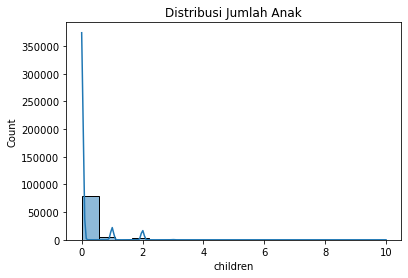

In [16]:
# Missing Value Handling - Children Column
sns.histplot(data=df, x='children', kde=True)
plt.title('Distribusi Jumlah Anak')
plt.show()

In [17]:
val = df.children.median()
df['children'] = df.children.fillna(val)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

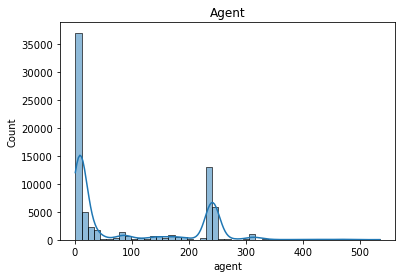

In [19]:
# Missing Value Handling - Agent Column
sns.histplot(data=df, x='agent', kde=True)
plt.title('Agent')
plt.show()

In [20]:
val = df.agent.median()
df['agent'] = df.agent.fillna(val)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [22]:
df.isnull(). sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Data Vizualization

In [23]:
df.hotel.value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

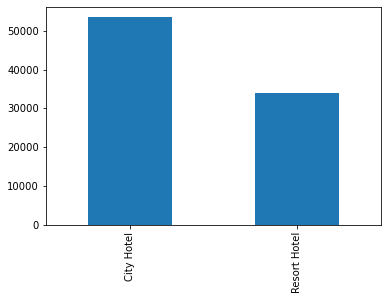

In [24]:
df.hotel.value_counts().plot(kind='bar');

Conclusion:
Based on data as many as 66% of visitors prefer city hotels to resort hotels for their accommodation

In [25]:
df.is_canceled.value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

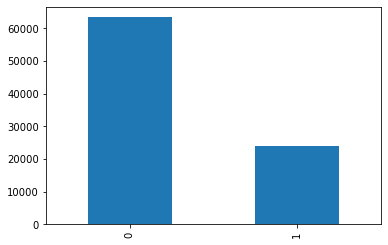

In [26]:
df.is_canceled.value_counts().plot(kind='bar');

Conclusion:
Based on data even though 63% of visitors do not cancel their orders, the number of order cancellations is still quite high, namely 37%, so the hotel needs to implement a strategy so that the number of order cancellations can be reduced.

In [27]:
df.meal.value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [28]:
percentage = df['meal'].value_counts(normalize=True) * 100
print(percentage)

BB           77.781592
SC           10.848323
HB           10.395213
Undefined     0.562955
FB            0.411918
Name: meal, dtype: float64


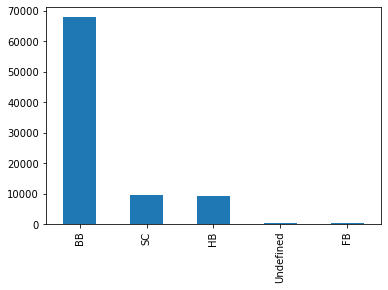

In [29]:
df.meal.value_counts().plot(kind='bar');

Conclusion:
Based on data as many as 77% of visitors made BB (Bed & Breakfast) food orders, while 12% of visitors made HB (Half board (breakfast and one other meal – usually dinner)) orders, the rest were full board orders, and there were visitors who did not order food.

In [30]:
df.reservation_status.value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

In [31]:
percentage = df['reservation_status'].value_counts(normalize=True) * 100
print(percentage)

Check-Out    72.510184
Canceled     26.329580
No-Show       1.160236
Name: reservation_status, dtype: float64


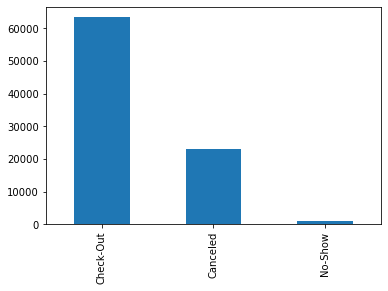

In [32]:
df.reservation_status.value_counts().plot(kind='bar');

Based on data reservation status, we can see that the percentage of visitors who have checked out is greater than those who have been canceled is 63% of those who checked out and 36% of those who were canceled and the remaining 1% who were no-shows.

--Task 2--

- create 1 visualization
- create story telling

In [33]:
df.hotel.value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

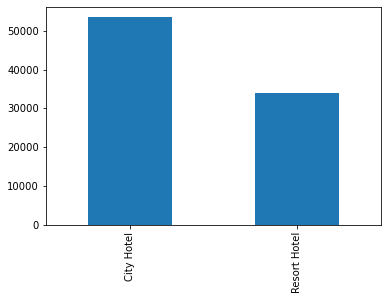

In [34]:
df.hotel.value_counts().plot(kind='bar');

<AxesSubplot:ylabel='hotel'>

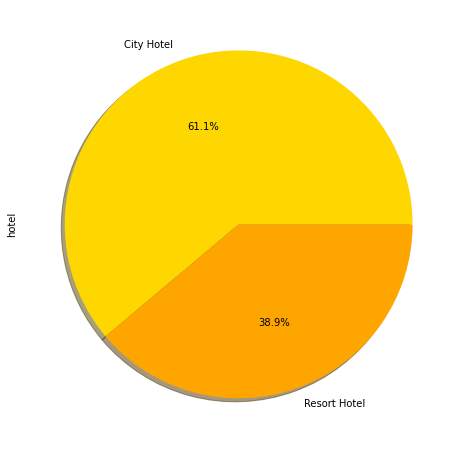

In [46]:
plt.figure(figsize=(15, 8))
cols = ['gold', 'orange']
df['hotel'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

based on the data above, you can see 2 types of hotels, namely city hotels and resort hotels and of all visitors it can be seen that more people choose to stay in city hotels by 61% and for resort hotels themselves there are 39% of people who choose to stay there.

--Task 2--

- create 1 visualization
- create story telling

In [35]:
df.meal.value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

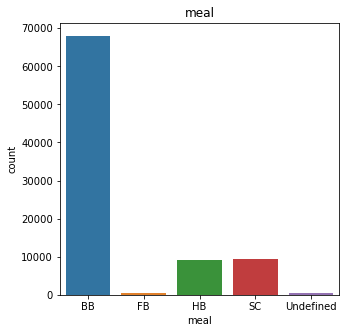

In [36]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['meal'])
ax.set_title('meal')
plt.show()

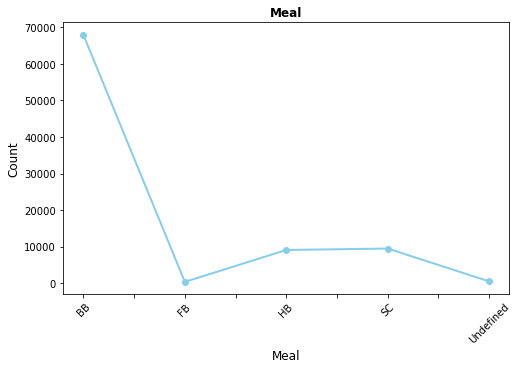

In [51]:
plt.figure(figsize=(8, 5))

# Membuat grafik garis
meal_counts = df['meal'].value_counts().sort_index()
meal_counts.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Judul plot
plt.title('Meal', weight='bold')

# Menambahkan label sumbu x dan y
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan grafik garis
plt.xticks(rotation=45)  # Untuk memutar label sumbu x jika diperlukan
plt.show()

Based on data, 77% of visitors order BB (Bed & Breakfast) meals, while 10% of visitors order SC (Self-Catering) or HB (Half board (breakfast and one other meal – usually dinner)), the rest order full board, and there are visitors who don't. ordering food.

--Task 2--

- create 1 visualization
- create story telling

In [37]:
df["arrival_date_month"].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

In [38]:
percentage = df['arrival_date_month'].value_counts(normalize=True) * 100
print(percentage)

August       12.880452
July         11.507392
May           9.559934
April         9.048469
June          8.884846
March         8.596503
October       7.934002
September     7.654813
February      6.977436
December      5.870978
November      5.715365
January       5.369811
Name: arrival_date_month, dtype: float64


In [39]:
# Kelompokkan data berdasarkan bulan dan hitung jumlah kedatangan
monthly_arrival_counts = df['arrival_date_month'].value_counts().reset_index()
monthly_arrival_counts.columns = ['Month', 'Count']

In [40]:
# Urutkan data berdasarkan jumlah kedatangan secara menurun
monthly_arrival_counts = monthly_arrival_counts.sort_values(by='Count', ascending=False)

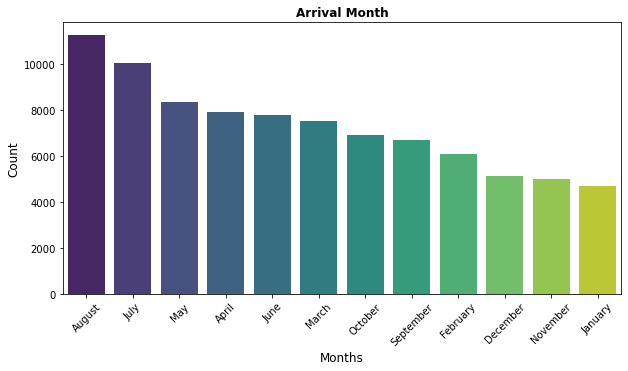

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Count', data=monthly_arrival_counts, palette='viridis')
plt.xticks(rotation=45)
plt.title('Arrival Month', weight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

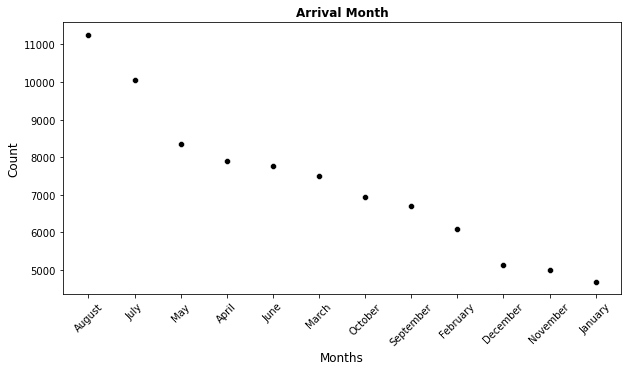

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Month', y='Count', data=monthly_arrival_counts, color='black')
plt.xticks(rotation=45)  
plt.title('Arrival Month', weight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Based on data, it shows the number of hotel orders every month. Based on this, August is the month with the most visitors (12.8%) and January is the month with the fewest visitors (5.3%),on January It's only half of August.

In [42]:
df["is_canceled"].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

<AxesSubplot:ylabel='is_canceled'>

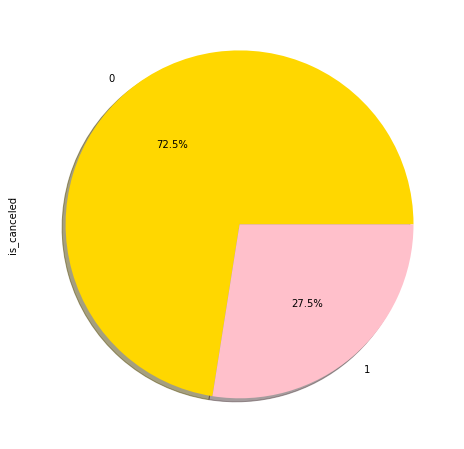

In [43]:
plt.figure(figsize=(15, 8))
cols = ['gold', 'pink']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

Based on data to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.